<a href="https://colab.research.google.com/github/danishmahmoodali/Deep-Learning-Projects/blob/main/Clustering/Clustering_Customer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Danish Mahmood Ali

B18101028

In [ ]:
!gdown --id 1Fu0_jnfrrsEAl4YcgyllktUSlAGM0HDX

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Fu0_jnfrrsEAl4YcgyllktUSlAGM0HDX
To: /content/segmentation data.csv
100% 61.5k/61.5k [00:00<00:00, 55.7MB/s]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [ ]:
customer_data = pd.read_csv('/content/segmentation data.csv')
customer_data

#Sex : 0= male, 1= female
#Marital status: 0= single 1= non-single (divorced / separated / married / widowed)
#Education: 0= unknown, 1= highschool, 2= university, 3= graduate school
#Occupation: 0= unemployed, 1= skilled employee / official, 2= management / self-employed / officer
#Settlement Size = 0: small city, 1= mid-sized city, 2= big city

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [ ]:
#stats about the data
customer_data.info()
customer_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
customer_data.isna().sum() #check for null values

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dee86a850>,
      dtype=object)

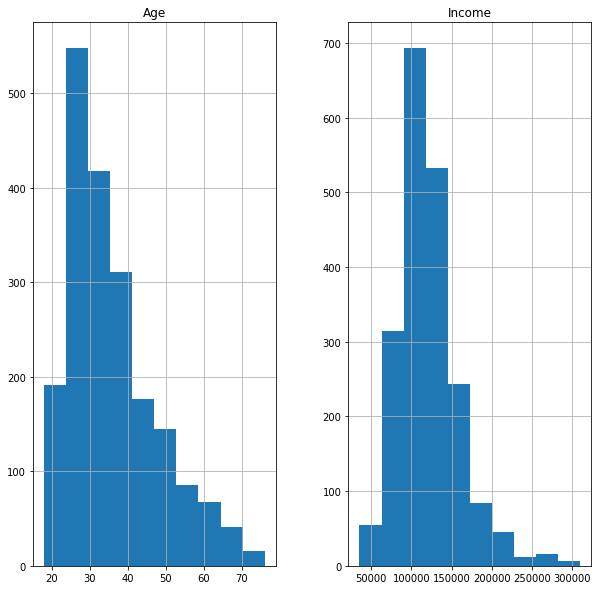

In [ ]:
#Visualization of the dataset
customer_data.drop(['ID','Sex','Marital status','Education','Occupation','Settlement size'],axis=1,inplace=True)
customer_data.hist(figsize=(10,10))


Text(0, 0.5, 'Income')

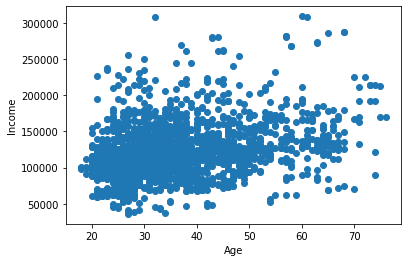

In [ ]:
plt.scatter(customer_data['Age'],customer_data['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [ ]:
def outlier_func(df1, _debug=False):
    """
    Takes a dataframe df of numerical features and returns a dict of column names and outlier counts.
    """
    outlier_dict = {}
    outlier_list = []
    for col in df1:
        Q1 = np.percentile(df1[col], 25)
        Q3 = np.percentile(df1[col], 75)
        IQR = Q3 - Q1
        outlier_list = (df1[(df1[col] < Q1 - 1.5 * IQR) |
                        (df1[col] > Q3 + 1.5 * IQR)].index)
        if _debug:
            print(col, ' contains ', len(outlier_list), '(', len(
                outlier_list)/len(df1[col]), ') outliers, out of ', len(df1[col]))
        outlier_dict[col] = outlier_list
    return outlier_dict


input = [col for col in customer_data.columns]
outlier_df = outlier_func(customer_data[input], _debug=True)

Age  contains  57 ( 0.0285 ) outliers, out of  2000
Income  contains  83 ( 0.0415 ) outliers, out of  2000


In [ ]:
#Scale the data
scaler = StandardScaler()
customer_data1 = scaler.fit_transform(customer_data)

In [ ]:
scores = []
for i in range(2,7):    #executing for n=2 to n=6
    model = KMeans(n_clusters = i)
    model.fit(customer_data1)
    scores.append(silhouette_score(customer_data1,model.labels_))
    labels = model.labels_
    customer_data.insert((customer_data.shape[1]),'kmeans_'+str(i),labels)
    centers = model.cluster_centers_


customer_data

,Age,Income,kmeans_2,kmeans_3,kmeans_4,kmeans_5,kmeans_6
0,67,124670,1,1,0,4,2
1,22,150773,0,2,3,0,0
2,49,89210,0,1,0,2,1
3,45,171565,1,2,2,4,0
4,53,149031,1,1,0,4,2
...,...,...,...,...,...,...,...
1995,47,123525,1,1,0,2,1
1996,27,117744,0,0,1,3,5
1997,31,86400,0,0,1,3,3
1998,24,97968,0,0,1,3,5


In [ ]:
print(scores)

[0.4423842520070404, 0.4386071442006107, 0.35034001297824724, 0.3646640265555531, 0.3513012903362806]


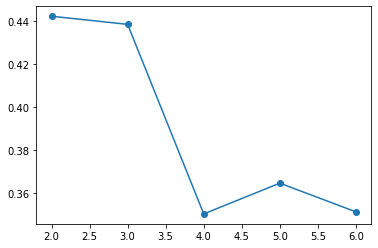

In [ ]:
plt.plot(range(2,7),scores,marker='o') #plotting scores of each execution

In [ ]:
#centers of the columns with 2-6 clusters
for i in range(2):
    print(customer_data.columns[i] , round(centers[0,i],2), round(centers[1,i],2), round(centers[2,i],2),\
          round(centers[3,i],2), round(centers[4,i],2))

Age -0.14 0.54 1.97 -0.74 0.52
Income 0.8 -0.43 0.61 -1.21 2.88


In [ ]:
cluster_data = pd.DataFrame()
for i in range(2):
    data = centers[:,i]
    cluster_data[customer_data.columns[i]] = data
cluster_data = cluster_data.round(decimals=1)
cluster_data.head

<bound method NDFrame.head of    Age  Income
0 -0.1     0.8
1  0.5    -0.4
2  2.0     0.6
3 -0.7    -1.2
4  0.5     2.9
5 -0.8    -0.2>

(array([369., 413., 235., 289.,  85., 609.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Patch objects>)

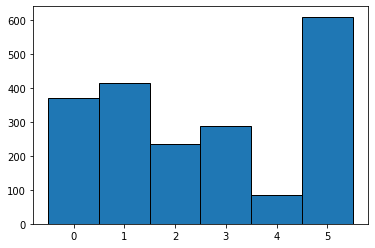

In [ ]:
plt.hist(labels, bins=6,ec='k',range=(-0.5,5.5))

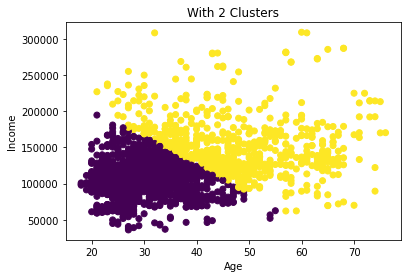

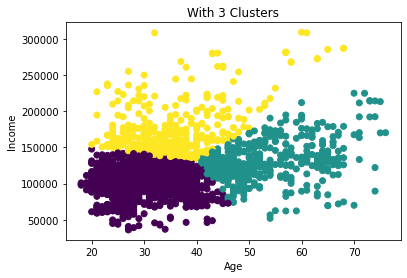

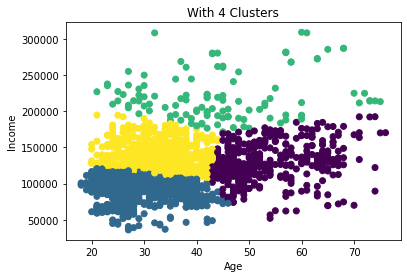

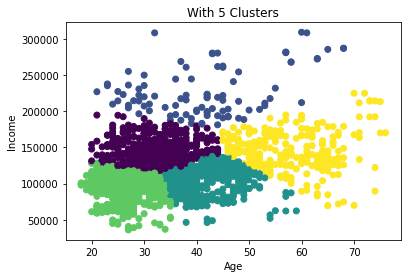

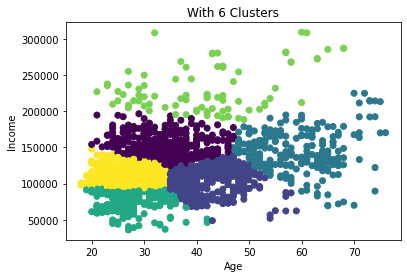

In [ ]:
colors = [customer_data['kmeans_2'],customer_data['kmeans_3'],customer_data['kmeans_4'],customer_data['kmeans_5'],customer_data['kmeans_6']]
j=2
for i in colors:
  plt.figure()
  plt.scatter(customer_data['Age'],customer_data['Income'],c=i)
  plt.xlabel('Age')
  plt.ylabel('Income')
  plt.title('With ' + str(j) + " Clusters")
  j+=1
plt.show()

In [ ]:
agc1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
agc1.fit_predict(customer_data1)

agc2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
agc2.fit_predict(customer_data1)

array([0, 2, 2, ..., 2, 2, 2])

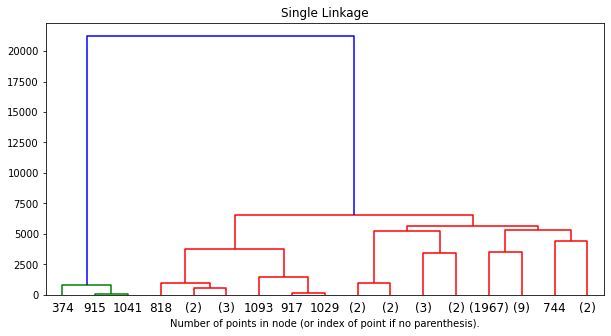

In [ ]:
import scipy.cluster.hierarchy as sch
fig1 = plt.figure()
fig1.set_size_inches(10,5)
plt.title('Single Linkage')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
dendro = sch.dendrogram(sch.linkage(customer_data,method='single'),p=4,truncate_mode='level')

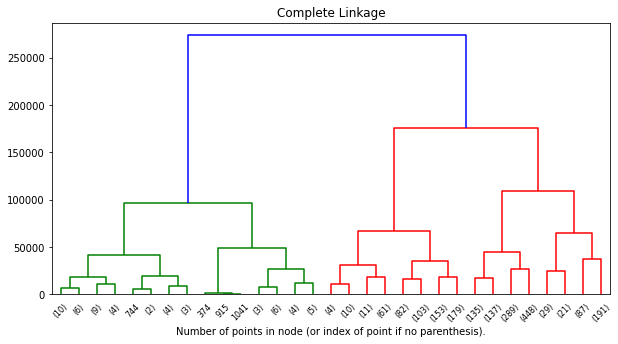

In [ ]:
fig1 = plt.figure()
plt.title('Complete Linkage')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
fig1.set_size_inches(10,5)
dendro = sch.dendrogram(sch.linkage(customer_data,method='complete'),p=4,truncate_mode='level')


Text(0.5, 1.0, 'Single Linkage')

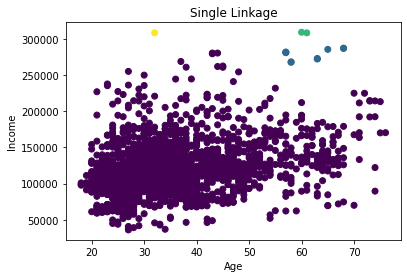

In [ ]:
plt.scatter(customer_data['Age'],customer_data['Income'],c=agc1.labels_)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Single Linkage')

Text(0.5, 1.0, 'Complete Linkage')

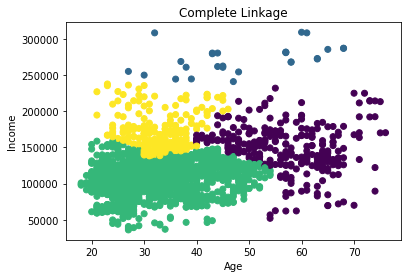

In [ ]:
plt.scatter(customer_data['Age'],customer_data['Income'],c=agc2.labels_)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Complete Linkage')